# Finding The Base

## Description of the Kaggle Contest

In this competition, you’ll help robots recognize the floor surface they’re standing on using data collected from Inertial Measurement Units (IMU sensors).

We’ve collected IMU sensor data while driving a small mobile robot over different floor surfaces on the university premises. The task is to predict which one of the nine floor types (carpet, tiles, concrete) the robot is on using sensor data such as acceleration and velocity. Succeed and you'll help improve the navigation of robots without assistance across many different surfaces, so they won’t fall down on the job.

### Understanding Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
train_data = pd.read_csv("X_train.csv")

In [3]:
print(train_data.shape)
train_data.head()

(487680, 13)


,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [4]:
train_data['series_id'].nunique()

3810

In [5]:
train_labels = pd.read_csv("y_train.csv")

In [6]:
print(train_labels.shape)
print(train_labels['surface'].nunique())
train_labels.head()

(3810, 3)
9


,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles


So, there are 3810 actual tested cases on 9 different categories of surfaces. We can see below that there is no missing data.

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487680 entries, 0 to 487679
Data columns (total 13 columns):
row_id                   487680 non-null object
series_id                487680 non-null int64
measurement_number       487680 non-null int64
orientation_X            487680 non-null float64
orientation_Y            487680 non-null float64
orientation_Z            487680 non-null float64
orientation_W            487680 non-null float64
angular_velocity_X       487680 non-null float64
angular_velocity_Y       487680 non-null float64
angular_velocity_Z       487680 non-null float64
linear_acceleration_X    487680 non-null float64
linear_acceleration_Y    487680 non-null float64
linear_acceleration_Z    487680 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 48.4+ MB


### Exploratory Data Analysis

In [8]:
def get_range(data_list):
    
    return max(data_list)-min(data_list)

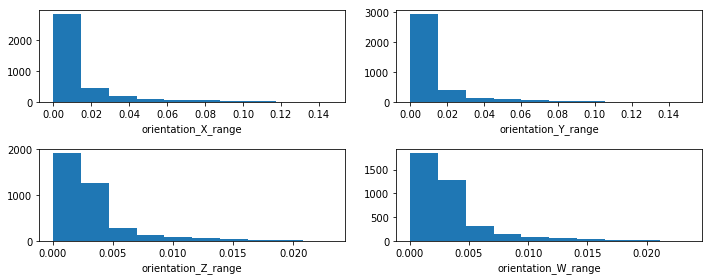

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(221)
plt.hist(train_data.groupby('series_id')['orientation_X'].apply(get_range))
plt.xlabel('orientation_X_range')
plt.subplot(222)
plt.hist(train_data.groupby('series_id')['orientation_Y'].apply(get_range))
plt.xlabel('orientation_Y_range')
plt.subplot(223)
plt.hist(train_data.groupby('series_id')['orientation_Z'].apply(get_range))
plt.xlabel('orientation_Z_range')
plt.subplot(224)
plt.hist(train_data.groupby('series_id')['orientation_W'].apply(get_range))
plt.xlabel('orientation_W_range')
plt.tight_layout()

As we can see from the above histograms, the values of 'orientation' in a given series do not vary much (as the 'range' values are very small here).

In [10]:
def plot_feature_variations(series_n_data, series_number, surface_type):
    
    plt.figure(figsize=(15,4))

    plt.subplot(231)
    plt.plot(series_n_data['measurement_number'],series_n_data['angular_velocity_X'])
    plt.xlabel('measurement_number')
    plt.ylabel('angular_velocity_X')

    plt.subplot(232)
    plt.plot(series_n_data['measurement_number'],series_n_data['angular_velocity_Y'])
    plt.xlabel('measurement_number')
    plt.ylabel('angular_velocity_Y')

    plt.subplot(233)
    plt.plot(series_n_data['measurement_number'],series_n_data['angular_velocity_Z'])
    plt.xlabel('measurement_number')
    plt.ylabel('angular_velocity_Z')

    plt.subplot(234)
    plt.plot(series_n_data['measurement_number'],series_n_data['linear_acceleration_X'])
    plt.xlabel('measurement_number')
    plt.ylabel('linear_acceleration_X')

    plt.subplot(235)
    plt.plot(series_n_data['measurement_number'],series_n_data['linear_acceleration_Y'])
    plt.xlabel('measurement_number')
    plt.ylabel('linear_acceleration_Y')

    plt.subplot(236)
    plt.plot(series_n_data['measurement_number'],series_n_data['linear_acceleration_Z'])
    plt.xlabel('measurement_number')
    plt.ylabel('linear_acceleration_Z')

    plt.tight_layout()

Feature Variations for Surface Type fine_concrete
Feature Variations for Surface Type concrete
Feature Variations for Surface Type soft_tiles


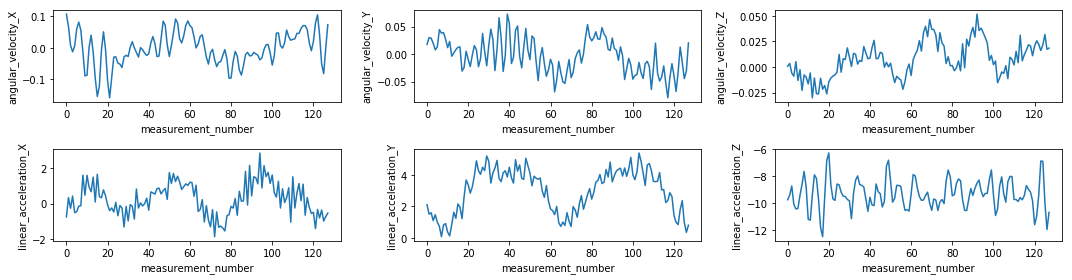

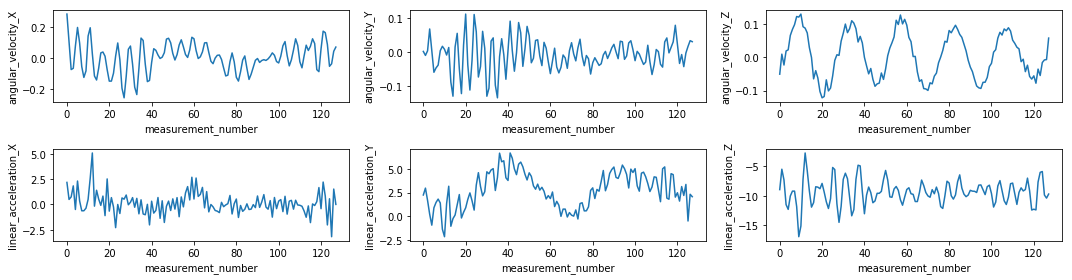

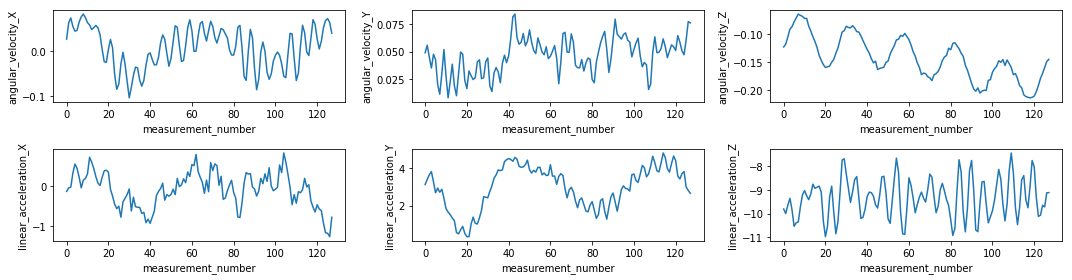

In [11]:
series_0_data=train_data[train_data['series_id']==0]
surface_type=train_labels['surface'][0]
print("Feature Variations for Surface Type {}".format(surface_type))
plot_feature_variations(series_0_data, 0 , surface_type)


series_1_data=train_data[train_data['series_id']==1]
surface_type=train_labels['surface'][1]
print("Feature Variations for Surface Type {}".format(surface_type))
plot_feature_variations(series_1_data, 1 , surface_type)

series_4_data=train_data[train_data['series_id']==4]
surface_type=train_labels['surface'][4]
print("Feature Variations for Surface Type {}".format(surface_type))
plot_feature_variations(series_4_data, 4 , surface_type)

The three sections of plots above show the velocity and acceleration data for three different series based on flooring type namely: fine_concrete, concrete, soft_tiles. One major observation from the above plots is that the time-series values have some inherent patterns and especially the 'angular_velocity_Z' seems to vary drastically with the flooring type.

To capture these variations in values across a series, we shall make use of multiple descriptive statistics features like mean, median, std, etc. and use them as features to train our classifier.

concrete                  779
soft_pvc                  732
wood                      607
tiled                     514
fine_concrete             363
hard_tiles_large_space    308
soft_tiles                297
carpet                    189
hard_tiles                 21
Name: surface, dtype: int64


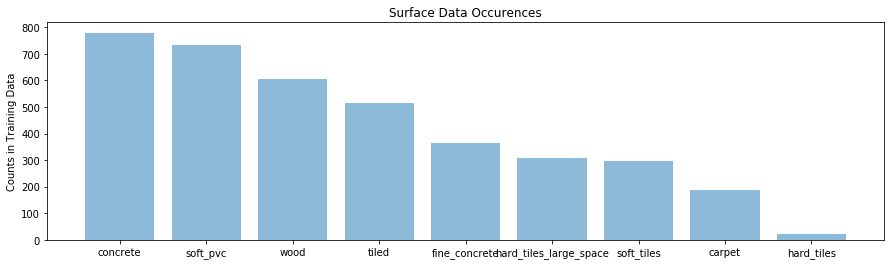

In [12]:
x = np.arange(9)
counts = train_labels['surface'].value_counts()
 
plt.figure(figsize=(15,4))
plt.bar(x, counts, align='center', alpha=0.5)
plt.xticks(x, train_labels['surface'].value_counts().index.tolist())
plt.ylabel('Counts in Training Data')
plt.title('Surface Data Occurences')

print(train_labels['surface'].value_counts())

y=train_labels['surface'].values

One key observation here is that the data is highly imbalanced with very less examples of hard_tiles in particular. So, this needs to be taken care of while splitting the data for cross-validation.

In [13]:
group_ids=train_labels['group_id']
print(group_ids.shape)
print(group_ids.nunique())

group_ids=np.array(group_ids)

(3810,)
73


The group_ids indicate the batches in which the training was conducted while recording the data. There are 73 such groups.

### Feature Extraction

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [15]:
train_features=train_data.drop(['row_id','measurement_number'],axis=1)

In [16]:
train_features.columns

Index(['series_id', 'orientation_X', 'orientation_Y', 'orientation_Z',
       'orientation_W', 'angular_velocity_X', 'angular_velocity_Y',
       'angular_velocity_Z', 'linear_acceleration_X', 'linear_acceleration_Y',
       'linear_acceleration_Z'],
      dtype='object')

In [17]:
# features = pd.DataFrame()
# features['mean']=

sc= MinMaxScaler()

def feature_transform(features_data):
    all_features=pd.DataFrame()
    
    features_data['orientation']=np.sqrt(features_data['orientation_X']**2+features_data['orientation_Y']**2+
                                         features_data['orientation_Z']**2+features_data['orientation_W']**2)
    
    features_data['ang_vel_mag']=np.sqrt(features_data['angular_velocity_X']**2 + 
                                features_data['angular_velocity_Y']**2 + features_data['angular_velocity_Z']**2)
    
    features_data['lin_acc_mag']=np.sqrt(features_data['linear_acceleration_X']**2 + 
                                features_data['linear_acceleration_Y']**2 + features_data['linear_acceleration_Z']**2)
    
    
    for col in features_data.columns:
        if col=='series_id':
            continue
        all_features[col+'_mean']=features_data.groupby('series_id')[col].mean()
        all_features[col+'_median']=features_data.groupby('series_id')[col].median()
        all_features[col+'_min']=features_data.groupby('series_id')[col].min()
        all_features[col+'_max']=features_data.groupby('series_id')[col].max()
        all_features[col+'_std']=features_data.groupby('series_id')[col].std()
        #all_features[col+'_q25']=features_data.groupby('series_id')[col].quantile(0.25)
        #all_features[col+'_q50']=features_data.groupby('series_id')[col].quantile(0.5)
        #all_features[col+'_q75']=features_data.groupby('series_id')[col].quantile(0.75)
        all_features[col+'_maxByMin']=all_features[col+'_max']/all_features[col+'_min']
        all_features[col+'_range']=all_features[col+'_max']-all_features[col+'_min']
       
        
    all_features=all_features.reset_index()
    all_features=all_features.drop(['series_id'],axis=1)
    all_features=sc.fit_transform(all_features)
    
    return all_features

In [18]:
all_train_features=feature_transform(train_features)

In [19]:
enc = LabelEncoder()
y_transformed=enc.fit_transform(np.reshape(y,(-1,1)))

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
y_transformed[:25]

array([2, 1, 1, 1, 6, 7, 5, 1, 4, 7, 5, 7, 0, 0, 1, 0, 0, 6, 7, 6, 7, 4,
       6, 7, 6])

In [21]:
X=np.array(all_train_features)
y=y_transformed

### Model Evaluation

In [22]:
test_data= pd.read_csv("X_test.csv")

In [23]:
test_data.shape

(488448, 13)

In [24]:
test_features=test_data.drop(['row_id','measurement_number'],axis=1)

In [25]:
all_test_features=feature_transform(test_features)

In [26]:
all_test_features=np.array(all_test_features)

print(len(all_test_features))
print(len(all_test_features[0]))

3816
91


In [27]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=20)
predicted = np.zeros((len(all_test_features),9))
measured= np.zeros(len(X))
score = 0

model = RandomForestClassifier(n_estimators=500, random_state=123, max_depth=15, min_samples_split=5)

for t, (trn_idx, val_idx) in enumerate(folds.split(X,y)):    
    model.fit(X[trn_idx],y[trn_idx])
    measured[val_idx] = model.predict(X[val_idx])
    predicted += model.predict_proba(all_test_features)/folds.n_splits
    score += model.score(X[val_idx],y[val_idx])
    print("Fold: {} score: {}".format(t,model.score(X[val_idx],y[val_idx])))

Fold: 0 score: 0.8420365535248042
Fold: 1 score: 0.865359477124183
Fold: 2 score: 0.8412073490813649
Fold: 3 score: 0.8447368421052631
Fold: 4 score: 0.8850726552179656


I have used StratifiedKFold validation as the classes are greatly imbaalanced in the training dataset.

In [28]:
print(confusion_matrix(measured,y))

[[145   6   0   0   5   4   4   6   4]
 [ 17 679  27   0  15  20   6  27  16]
 [  0   6 273   0   4   4   1   3   6]
 [  0   0   0  10   0   0   0   0   0]
 [  1  14   3   0 266   9   0   4   0]
 [  5  24  12   0   3 657  11   9  39]
 [  8   8   3   2   0  16 262   6   3]
 [  2  15  14   0   0   4   4 448  19]
 [ 11  27  31   9  15  18   9  11 520]]


In [29]:
print('Average Accuracy is ',score/folds.n_splits)

Average Accuracy is  0.855682575410716


### Submission File

In [30]:
submission_file=pd.read_csv("sample_submission.csv")

In [31]:
results=pd.DataFrame(enc.inverse_transform(predicted.argmax(axis=1)))

In [32]:
results.head()

,0
0,hard_tiles_large_space
1,carpet
2,tiled
3,soft_tiles
4,soft_tiles


In [33]:
final_submission=submission_file.drop(['surface'],axis=1)

In [34]:
final_submission=pd.concat([final_submission,results],axis=1,ignore_index=True)

In [35]:
final_submission.to_csv("submission_file.csv",header=['series_id','surface'],index=False)